In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import cohen_kappa_score
from scipy.stats import pearsonr
import seaborn as sns

In [10]:
# Load the CSV file
path_to_csv = os.path.join(os.path.abspath(""), "src", "bench", "results.csv")
print(f"Path: {path_to_csv}")
df = pd.read_csv(path_to_csv)
# Replace NaN values with empty strings
df.fillna("", inplace=True)

df.head()

Path: /home/gromdimon/Working/auto-acmg/src/bench/results.csv


,Variant,Expected Criteria,AutoACMG Criteria,AutoACMG Prediction time,Intervar Criteria,Intervar Prediction time,Genebe Criteria,Genebe Prediction time,Comment
0,4-113568536-G-GA,PVS1;PM2;PP5,PVS1;BP7,0.418377,,0.0,PVS1;PM2;PP5,0.280817,Gene: LARP7
1,NM_004360.3:c.1085delT,PVS1;PS4;PM2;PM5,PVS1;BP7,0.412406,,0.0,PVS1;PS4;PM2;PM5,0.224235,Gene: CDH1; p.Val362GlyfsTer31; From Recommend...
2,NM_000152.4:c.525delT,PVS1;PM2;PM3;PP4,PVS1;BS1;BP7,0.411082,,0.0,PVS1;PM2;PM3;PP4,0.260823,Gene: GAA; p.Glu176ArgfsTer45; From Recommenda...
3,NM_000152.4:c.1987delC,PVS1;PM2;PP5,PVS1;BP7,0.447981,,0.0,PVS1;PM2;PP5,0.247853,Gene: GAA; p.Gln663SerfsTer33; From Recommenda...
4,NM_000152.4:c.2706delG,PVS1;PM2;PM3;PP4,PVS1;BP7,0.415157,,0.0,PVS1;PM2;PM3;PP4,0.248040,Gene: GAA; p.Lys903ArgfsTer2; From Recommendat...


In [12]:
# Define the criteria and not_implemented lists
criteria = [
    "PVS1",
    "PS1",
    "PS2",
    "PS3",
    "PS4",
    "PM1",
    "PM2",
    "PM3",
    "PM4",
    "PM5",
    "PM6",
    "PP1",
    "PP2",
    "PP3",
    "PP4",
    "PP5",
    "BA1",
    "BS1",
    "BS2",
    "BS3",
    "BS4",
    "BP1",
    "BP2",
    "BP3",
    "BP4",
    "BP5",
    "BP6",
    "BP7",
]

not_implemented = [
    "PS2",
    "PS3",
    "PS4",
    "PM3",
    "PM6",
    "PP1",
    "PP4",
    "PP5",
    "BS3",
    "BS4",
    "BP2",
    "BP5",
    "BP6",
]


# Function to compute Cohen's Kappa for each criterion
def compute_kappa(df, criteria):
    kappa_results = {
        "Criteria": [],
        "AutoACMG Kappa": [],
        "Intervar Kappa": [],
        "Genebe Kappa": [],
    }

    for c in criteria:
        if c in not_implemented:
            continue

        expected = df["Expected Criteria"].apply(lambda x: 1 if c in x else 0)
        autoacmg = df["AutoACMG Criteria"].apply(lambda x: 1 if c in x else 0)
        intervar = df["Intervar Criteria"].apply(lambda x: 1 if c in x else 0)
        genebe = df["Genebe Criteria"].apply(lambda x: 1 if c in x else 0)

        kappa_results["Criteria"].append(c)
        kappa_results["AutoACMG Kappa"].append(cohen_kappa_score(expected, autoacmg))
        kappa_results["Intervar Kappa"].append(cohen_kappa_score(expected, intervar))
        kappa_results["Genebe Kappa"].append(cohen_kappa_score(expected, genebe))

    return pd.DataFrame(kappa_results)

In [13]:
# Compute Cohen's Kappa for the criteria
kappa_df = compute_kappa(df, criteria)
display(kappa_df)

# Export the results to a CSV file
kappa_df.to_csv("cohens_kappa_results.csv", index=False)

,Criteria,AutoACMG Kappa,Intervar Kappa,Genebe Kappa
0,PVS1,0.905942,0.234902,0.952971
1,PS1,0.348165,0.000000,0.708042
2,PM1,-0.005815,0.328137,0.610023
3,PM2,-0.384076,0.503012,0.540544
4,PM4,1.000000,0.000000,0.660569
5,PM5,0.631155,0.100984,0.675432
6,PP2,0.000000,-0.065567,0.806282
7,PP3,0.283262,0.591459,0.754988
8,BA1,0.000000,0.100984,0.756264
9,BS1,-0.011178,-0.060991,0.583125


## Add more info

In [8]:
# Load the CSV file
path_to_csv = os.path.join(os.path.abspath(""), "src", "bench", "kappa_plus.csv")
print(f"Path: {path_to_csv}")
kappa_df = pd.read_csv(path_to_csv)
kappa_df.fillna(value=0, inplace=True)
kappa_df

Path: /home/gromdimon/Working/auto-acmg/src/bench/kappa_plus.csv


,Criteria,AutoACMG Kappa,Intervar Kappa,Genebe Kappa,Count,Number of genes,Missing data,VCEP
0,PVS1,0.976204,0.256055,0.975358,24,0.0,0.0,0.0
1,PS1,0.698094,0.000000,0.902935,12,7.0,5.0,8.0
2,PM1,0.580488,0.289001,0.942204,48,16.0,21.0,48.0
3,PM2,0.190735,0.371804,0.950836,105,21.0,40.0,87.0
4,PM4,1.000000,0.000000,1.000000,3,1.0,0.0,0.0
5,PM5,0.808079,0.094429,0.963350,33,14.0,11.0,24.0
6,PP2,-0.011522,-0.062840,0.970728,48,12.0,19.0,40.0
7,PP3,0.797395,0.623907,1.000000,71,23.0,0.0,32.0
8,BA1,0.268085,0.082317,0.948850,37,18.0,0.0,37.0
9,BS1,0.314741,-0.084034,0.887040,15,7.0,0.0,15.0


In [ ]:
def count_variants_and_genes_with_criteria(kappa_df, results_df):
    criteria_counts = []
    gene_counts = []

    for criteria in kappa_df["Criteria"]:
        count_variants = results_df["Expected Criteria"].str.contains(criteria).sum()
        genes = results_df.loc[results_df["Expected Criteria"].str.contains(criteria), "Variant"]
        unique_genes = genes.str.extract(r"\(([^)]+)\)")[0].nunique()

        criteria_counts.append(count_variants)
        gene_counts.append(unique_genes)

    kappa_df["Number of Variants"] = criteria_counts
    kappa_df["Number of Genes"] = gene_counts

    return kappa_df


df_plus = count_variants_and_genes_with_criteria(kappa_df, df)
df_plus.to_csv("kappa_plus.csv", index=False)
df_plus

### False Negatives

In [ ]:
# Load the CSV file
path_to_csv = os.path.join(os.path.abspath(""), "src", "bench", "tmp", "results.csv")
print(f"Path: {path_to_csv}")
res_df = pd.read_csv(path_to_csv)
res_df.head(2)

In [ ]:
# Find missing data for PM2,..
def find_error_in_response(df):
    # Filter rows with PM2 in Expected Criteria
    pm2_variants = df[df["Expected Criteria"].str.contains("PP3")]

    # Check if the error message is in the AutoACMG Full Response column
    pm2_variants["Error Present"] = pm2_variants["AutoACMG Full Response"].str.contains(
        "Missing dbNSFP data"
    )

    return pm2_variants[["Variant", "Expected Criteria", "AutoACMG Full Response", "Error Present"]]


# Apply the function
result_df = find_error_in_response(res_df)
print(result_df["Error Present"].value_counts())

### Missing data

In [ ]:
# Load the CSV file
path_to_csv = os.path.join(os.path.abspath(""), "src", "bench", "bp7_stats.csv")
print(f"Path: {path_to_csv}")
bp7_df = pd.read_csv(path_to_csv)
bp7_df.head(2)

In [ ]:
# Find missing data for PM2,..
patt = ["Missing CADD", "Missing dbscsnv", "Missing SpliceAI"]


def err_pres(details: str):
    for p in patt:
        if details.str.contains(p):
            return True
    return False


def find_error_in_response(df):
    # Filter rows with PM2 in Expected Criteria
    pm2_variants = df[df["Expected Criteria"].str.contains("BP7")]

    error_conditions = pm2_variants["AutoACMG Full Response"].apply(
        lambda x: ("Missing CADD" in x) or ("Missing dbscsnv" in x) and ("Missing SpliceAI" in x)
    )
    # Check if the error message is in the AutoACMG Full Response column
    pm2_variants["Error Present"] = error_conditions

    return pm2_variants[["Variant", "Expected Criteria", "AutoACMG Full Response", "Error Present"]]


# Apply the function
result_df = find_error_in_response(bp7_df)
result_df["Error Present"].value_counts()

### VCEP

In [ ]:
import re


def extract_genes(df):
    # Define a function to extract gene names from the Variant column
    def get_gene_name(variant):
        match = re.search(r"\((.*?)\)", variant)
        if match:
            return match.group(1)
        return None

    # Apply the function to the Variant column and drop None values
    df["Gene"] = df["Variant"].apply(get_gene_name)

    # Get the unique list of gene names
    gene_list = df["Gene"].dropna().unique().tolist()

    return gene_list


# Apply the function to get the list of genes
gene_list = extract_genes(df)
print(gene_list)

In [ ]:
VCEP_NO_EFFECT = {
    "HRAS": "PS2;PM4;PM6;PP3;BP2;BP3",
    "PAH": "PM2;PM3;PM4;PM5;PP1;PP3;BS4;BP5",
    "MYH7": "PS1;BP4",
    "GAMT": "PVS1;PM3;PM4",
    "KCNQ4": "PVS1;PM3;PM4;PM6;PP1;BP3;BP7",
    "KRAS": "PM4;PP3;BP3;BP4;BP5",
    "BRAF": "PM4;PM6;PP3;BP2;BP3",
    "GAA": "PVS1;PS1;PM3;PM4;PM5;BP7",
    "RUNX1": "PS1;PM2;PM5;BP2",
    "SOS1": "PM4;PM6;PP3;BP2;BP3;BP5",
    "MAP2K2": "PM4;PM6;PP3;BP2;BP3",
    "PTPN11": "PM4;PM6;PP3;BP2;BP3",
    "TP53": "PS1;PS2;PM6",
    "RYR1": "PS1;BP2;BP7",
    "MECP2": "PS1",
    "GCK": "PM3;PM4",
    "RAF1": "PM4;PM6;PP3;BP2;BP3",
    "MAP2K1": "PM4;PM6;PP3;BP2;BP3",
    "CDKL5": "PVS1;PS1",
    "ETHE1": "PVS1;PS1;PS2;PS3;PM3;PM4;PM5;PM6;BS2;BS3;BS4;BP2;BP3;BP5;BP7",
    "MTOR": "PS1;PM5;BP2;BP5",
    "PTEN": "PP2;BP1",
    "SHOC2": "PM4;PM6;PP3;BP2;BP3",
    "APC": "PP2;BP1;BP5",
    "PALB2": "",
    "MYO6": "PVS1;PS1;PS2;PM4;PP4;BP3;BP7",
    "SLC26A4": "PVS1;PS1;PS2;PM4;PP4;BP3;BP7",
    "LDLR": "PS1;PS2;PM6",
    "HNF1A": "PS1;PM4;PM5",
    "COCH": "PVS1;PS1;PS2;PM4;PP4;BP3;BP7",
    "USH2A": "PVS1;PS1;PS2;PM4;PP4;BP3;BP7",
    "ITGB3": "PVS1;PS1;PS2;PM4;PM5;BP3;BP7",
    "FOXG1": "PS1;PM5",
}


def extract_gene(variant):
    match = re.search(r"\((.*?)\)", variant)
    return match.group(1) if match else None


def update_kappa_df(kappa_df, results_df):
    kappa_df["Number of Variants"] = 0
    kappa_df["Number of Genes"] = 0
    kappa_df["Variants with Criteria in Gene"] = 0

    for i, row in kappa_df.iterrows():
        criteria = row["Criteria"]

        # Extract variants and genes with the criteria
        variants_with_criteria = results_df[
            results_df["Expected Criteria"].str.contains(criteria, na=False)
        ]
        gene_list = variants_with_criteria["Variant"].apply(extract_gene).dropna().unique()

        # Count the number of variants and genes with the criteria
        kappa_df.at[i, "Number of Variants"] = len(variants_with_criteria)
        kappa_df.at[i, "Number of Genes"] = len(gene_list)

        # Count the number of variants where the criteria is in the gene dictionary
        count_criteria_in_gene = 0
        for variant in variants_with_criteria["Variant"]:
            gene = extract_gene(variant)
            if gene and gene in VCEP_NO_EFFECT:
                if criteria in VCEP_NO_EFFECT[gene]:
                    count_criteria_in_gene += 1

        kappa_df.at[i, "Variants with Criteria in Gene"] = count_criteria_in_gene

    return kappa_df


df_plus = update_kappa_df(kappa_df, df)
df_plus

## Other statistics

In [14]:
# Load the CSV file
path_to_csv = os.path.join(os.path.abspath(""), "src", "bench", "kappa_plus.csv")
print(f"Path: {path_to_csv}")
kappa_df = pd.read_csv(path_to_csv)
kappa_df.fillna(value=0, inplace=True)
kappa_df

Path: /home/gromdimon/Working/auto-acmg/src/bench/kappa_plus.csv


,Criteria,AutoACMG Kappa,Intervar Kappa,Genebe Kappa,Count,Number of genes,Missing data,VCEP
0,PVS1,0.976204,0.256055,0.975358,24,0.0,0.0,0.0
1,PS1,0.698094,0.000000,0.902935,12,7.0,5.0,8.0
2,PM1,0.580488,0.289001,0.942204,48,16.0,21.0,48.0
3,PM2,0.190735,0.371804,0.950836,105,21.0,40.0,87.0
4,PM4,1.000000,0.000000,1.000000,3,1.0,0.0,0.0
5,PM5,0.808079,0.094429,0.963350,33,14.0,11.0,24.0
6,PP2,-0.011522,-0.062840,0.970728,48,12.0,19.0,40.0
7,PP3,0.797395,0.623907,1.000000,71,23.0,0.0,32.0
8,BA1,0.268085,0.082317,0.948850,37,18.0,0.0,37.0
9,BS1,0.314741,-0.084034,0.887040,15,7.0,0.0,15.0


In [15]:
df.head(1)

,Variant,Expected Criteria,AutoACMG Criteria,AutoACMG Prediction time,Intervar Criteria,Intervar Prediction time,Genebe Criteria,Genebe Prediction time,Comment
0,4-113568536-G-GA,PVS1;PM2;PP5,PVS1;BP7,0.418377,,0.0,PVS1;PM2;PP5,0.280817,Gene: LARP7


In [16]:
def calculate_statistics(results_df, criteria):
    """Calculate statistics for each criterion."""
    statistics = {
        c: {
            "A_TP": 0,
            "A_FN": 0,
            "A_FP": 0,
            "I_TP": 0,
            "I_FN": 0,
            "I_FP": 0,
            "G_TP": 0,
            "G_FN": 0,
            "G_FP": 0,
        }
        for c in criteria
    }

    for i, row in results_df.iterrows():
        expected_criteria = set(row["Expected Criteria"].split(";"))
        autoacmg_criteria = set(row["AutoACMG Criteria"].split(";"))
        intervar_criteria = set(row["Intervar Criteria"].split(";"))
        genebe_criteria = set(row["Genebe Criteria"].split(";"))

        for criterion in criteria:
            # AutoACMG
            if criterion in expected_criteria and criterion in autoacmg_criteria:
                statistics[criterion]["A_TP"] += 1
            elif criterion in expected_criteria and criterion not in autoacmg_criteria:
                statistics[criterion]["A_FN"] += 1
            elif criterion not in expected_criteria and criterion in autoacmg_criteria:
                statistics[criterion]["A_FP"] += 1

            # InterVar
            if criterion in expected_criteria and criterion in intervar_criteria:
                statistics[criterion]["I_TP"] += 1
            elif criterion in expected_criteria and criterion not in intervar_criteria:
                statistics[criterion]["I_FN"] += 1
            elif criterion not in expected_criteria and criterion in intervar_criteria:
                statistics[criterion]["I_FP"] += 1

            # Genebe
            if criterion in expected_criteria and criterion in genebe_criteria:
                statistics[criterion]["G_TP"] += 1
            elif criterion in expected_criteria and criterion not in genebe_criteria:
                statistics[criterion]["G_FN"] += 1
            elif criterion not in expected_criteria and criterion in genebe_criteria:
                statistics[criterion]["G_FP"] += 1
    return statistics


def update_kappa_df_with_statistics(kappa_df, results_df):
    """Update kappa_df with TP, FN, FP for each criterion."""
    criteria = kappa_df["Criteria"].tolist()
    statistics = calculate_statistics(results_df, criteria)

    # AutoACMG
    kappa_df["A_TP"] = kappa_df["Criteria"].apply(lambda x: statistics[x]["A_TP"])
    kappa_df["A_FN"] = kappa_df["Criteria"].apply(lambda x: statistics[x]["A_FN"])
    kappa_df["A_FP"] = kappa_df["Criteria"].apply(lambda x: statistics[x]["A_FP"])

    # Intervar
    kappa_df["I_TP"] = kappa_df["Criteria"].apply(lambda x: statistics[x]["I_TP"])
    kappa_df["I_FN"] = kappa_df["Criteria"].apply(lambda x: statistics[x]["I_FN"])
    kappa_df["I_FP"] = kappa_df["Criteria"].apply(lambda x: statistics[x]["I_FP"])

    # Genebe
    kappa_df["G_TP"] = kappa_df["Criteria"].apply(lambda x: statistics[x]["G_TP"])
    kappa_df["G_FN"] = kappa_df["Criteria"].apply(lambda x: statistics[x]["G_FN"])
    kappa_df["G_FP"] = kappa_df["Criteria"].apply(lambda x: statistics[x]["G_FP"])
    return kappa_df


# Apply the function to update the kappa_df with statistics
kappa_df = update_kappa_df_with_statistics(kappa_df, df)

# Display the updated kappa_df
kappa_df

,Criteria,AutoACMG Kappa,Intervar Kappa,Genebe Kappa,Count,Number of genes,Missing data,VCEP,A_TP,A_FN,A_FP,I_TP,I_FN,I_FP,G_TP,G_FN,G_FP
0,PVS1,0.976204,0.256055,0.975358,24,0.0,0.0,0.0,24,0,1,4,20,0,23,1,0
1,PS1,0.698094,0.000000,0.902935,12,7.0,5.0,8.0,9,3,4,0,12,0,10,2,0
2,PM1,0.580488,0.289001,0.942204,48,16.0,21.0,48.0,40,8,24,45,3,66,46,2,2
3,PM2,0.190735,0.371804,0.950836,105,21.0,40.0,87.0,33,72,6,85,20,30,104,1,3
4,PM4,1.000000,0.000000,1.000000,3,1.0,0.0,0.0,3,0,0,0,3,0,3,0,0
5,PM5,0.808079,0.094429,0.963350,33,14.0,11.0,24.0,27,6,4,2,31,0,33,0,2
6,PP2,-0.011522,-0.062840,0.970728,48,12.0,19.0,40.0,0,48,1,3,45,14,46,2,0
7,PP3,0.797395,0.623907,1.000000,71,23.0,0.0,32.0,64,7,10,67,4,29,71,0,0
8,BA1,0.268085,0.082317,0.948850,37,18.0,0.0,37.0,7,30,0,2,35,0,36,1,2
9,BS1,0.314741,-0.084034,0.887040,15,7.0,0.0,15.0,13,2,36,0,15,12,13,2,1


In [18]:
def calculate_metrics(df, tp_col, fn_col, fp_col):
    precision = df[tp_col] / (df[tp_col] + df[fp_col])
    recall = df[tp_col] / (df[tp_col] + df[fn_col])
    f1_score = 2 * (precision * recall) / (precision + recall)
    return precision, recall, f1_score


def add_metrics_to_df(kappa_df):
    (
        kappa_df["AutoACMG Precision"],
        kappa_df["AutoACMG Recall"],
        kappa_df["AutoACMG F1"],
    ) = calculate_metrics(kappa_df, "A_TP", "A_FN", "A_FP")
    (
        kappa_df["Intervar Precision"],
        kappa_df["Intervar Recall"],
        kappa_df["Intervar F1"],
    ) = calculate_metrics(kappa_df, "I_TP", "I_FN", "I_FP")
    kappa_df["Genebe Precision"], kappa_df["Genebe Recall"], kappa_df["Genebe F1"] = (
        calculate_metrics(kappa_df, "G_TP", "G_FN", "G_FP")
    )
    return kappa_df


# Add metrics to kappa_df
kappa_df = add_metrics_to_df(kappa_df)

# Display the updated kappa_df
kappa_df

,Criteria,AutoACMG Kappa,Intervar Kappa,Genebe Kappa,Count,Number of genes,Missing data,VCEP,A_TP,A_FN,...,G_FP,AutoACMG Precision,AutoACMG Recall,AutoACMG F1,Intervar Precision,Intervar Recall,Intervar F1,Genebe Precision,Genebe Recall,Genebe F1
0,PVS1,0.976204,0.256055,0.975358,24,0.0,0.0,0.0,24,0,...,0,0.960000,1.000000,0.979592,1.000000,0.166667,0.285714,1.000000,0.958333,0.978723
1,PS1,0.698094,0.000000,0.902935,12,7.0,5.0,8.0,9,3,...,0,0.692308,0.750000,0.720000,NaN,0.000000,NaN,1.000000,0.833333,0.909091
2,PM1,0.580488,0.289001,0.942204,48,16.0,21.0,48.0,40,8,...,2,0.625000,0.833333,0.714286,0.405405,0.937500,0.566038,0.958333,0.958333,0.958333
3,PM2,0.190735,0.371804,0.950836,105,21.0,40.0,87.0,33,72,...,3,0.846154,0.314286,0.458333,0.739130,0.809524,0.772727,0.971963,0.990476,0.981132
4,PM4,1.000000,0.000000,1.000000,3,1.0,0.0,0.0,3,0,...,0,1.000000,1.000000,1.000000,NaN,0.000000,NaN,1.000000,1.000000,1.000000
5,PM5,0.808079,0.094429,0.963350,33,14.0,11.0,24.0,27,6,...,2,0.870968,0.818182,0.843750,1.000000,0.060606,0.114286,0.942857,1.000000,0.970588
6,PP2,-0.011522,-0.062840,0.970728,48,12.0,19.0,40.0,0,48,...,0,0.000000,0.000000,NaN,0.176471,0.062500,0.092308,1.000000,0.958333,0.978723
7,PP3,0.797395,0.623907,1.000000,71,23.0,0.0,32.0,64,7,...,0,0.864865,0.901408,0.882759,0.697917,0.943662,0.802395,1.000000,1.000000,1.000000
8,BA1,0.268085,0.082317,0.948850,37,18.0,0.0,37.0,7,30,...,2,1.000000,0.189189,0.318182,1.000000,0.054054,0.102564,0.947368,0.972973,0.960000
9,BS1,0.314741,-0.084034,0.887040,15,7.0,0.0,15.0,13,2,...,1,0.265306,0.866667,0.406250,0.000000,0.000000,NaN,0.928571,0.866667,0.896552


In [19]:
# Export the updated kappa_df to CSV
kappa_df.to_csv("updated_kappa_df_with_metrics.csv", index=False)

### Other help functions

In [ ]:
def remove_conflicting_criteria(row):
    criteria_to_remove = {
        "PVS1": ["PP3", "PM4", "BP4"],
        "BA1": ["BS1", "BS2"],
        "PM1": ["BP3", "PP2"],
        "PM2": ["BS1", "BS2"],
        "PM4": ["PP3"],
    }

    autoacmg_criteria = row["AutoACMG Criteria"].split(";")
    autoacmg_false_positives = row["AutoACMG False Positives"].split(";")

    for key, values in criteria_to_remove.items():
        if key in autoacmg_criteria:
            autoacmg_criteria = [c for c in autoacmg_criteria if c not in values]
            autoacmg_false_positives = [c for c in autoacmg_false_positives if c not in values]

    row["AutoACMG Criteria"] = ";".join(autoacmg_criteria)
    row["AutoACMG False Positives"] = ";".join(autoacmg_false_positives)

    return row


# Apply the function to the dataframe
df = df.apply(remove_conflicting_criteria, axis=1)

In [24]:
very_strong = ["PVS1"]
strong = ["PS1", "PS2", "PS3", "PS4"]
moderate = ["PM1", "PM2", "PM3", "PM4", "PM5", "PM6"]
supporting = ["PP1", "PP2", "PP3", "PP4", "PP5"]
stand_alone = ["BA1"]
strong_benign = ["BS1", "BS2", "BS3", "BS4"]
supporting_benign = ["BP1", "BP2", "BP3", "BP4", "BP5", "BP6", "BP7"]


def classify_variant(criteria_list):
    very_strong_count = len([c for c in criteria_list if c in very_strong])
    strong_count = len([c for c in criteria_list if c in strong])
    moderate_count = len([c for c in criteria_list if c in moderate])
    supporting_count = len([c for c in criteria_list if c in supporting])
    stand_alone_count = len([c for c in criteria_list if c in stand_alone])
    strong_benign_count = len([c for c in criteria_list if c in strong_benign])
    supporting_benign_count = len([c for c in criteria_list if c in supporting_benign])

    # Pathogenic
    if (
        very_strong_count >= 1
        and (
            strong_count >= 1
            or moderate_count >= 2
            or (moderate_count >= 1 and supporting_count >= 1)
            or supporting_count >= 2
        )
    ) or (
        strong_count >= 2
        or (strong_count >= 1 and moderate_count >= 3)
        or (moderate_count >= 2 and supporting_count >= 2)
        or (moderate_count >= 1 and supporting_count >= 4)
    ):
        return 2  # Pathogenic

    # Likely Pathogenic
    if (
        (very_strong_count >= 1 and moderate_count >= 1)
        or (strong_count >= 1 and 1 <= moderate_count <= 2)
        or (strong_count >= 1 and supporting_count >= 2)
        or (moderate_count >= 3)
        or (moderate_count >= 2 and supporting_count >= 2)
        or (moderate_count >= 1 and supporting_count >= 4)
    ):
        return 1  # Likely Pathogenic

    # Benign
    if stand_alone_count >= 1 or strong_benign_count >= 2:
        return -2  # Benign

    # Likely Benign
    if (strong_benign_count >= 1 and supporting_benign_count >= 1) or (
        supporting_benign_count >= 2
    ):
        return -1  # Likely Benign

    return 0  # Uncertain Significance

In [25]:
# Define a function to split criteria strings into lists
def split_criteria(criteria_str):
    if pd.isna(criteria_str) or criteria_str == "":
        return []
    return criteria_str.split(";")


# Apply the function to create lists of criteria
df["AutoACMG Criteria List"] = df["AutoACMG Criteria"].apply(split_criteria)
df["Intervar Criteria List"] = df["Intervar Criteria"].apply(split_criteria)
df["Genebe Criteria List"] = df["Genebe Criteria"].apply(split_criteria)
df["Expected Criteria List"] = df["Expected Criteria"].apply(split_criteria)

# Apply the classification function to each list of criteria
df["AutoACMG_Score"] = df["AutoACMG Criteria List"].apply(classify_variant)
df["Intervar_Score"] = df["Intervar Criteria List"].apply(classify_variant)
df["Genebe_Score"] = df["Genebe Criteria List"].apply(classify_variant)
df["ClinGen_Score"] = df["Expected Criteria List"].apply(classify_variant)

# Display the updated DataFrame
print(df)

# Save the updated DataFrame to a CSV file
df.to_csv("updated_results_with_classification_scores.csv", index=False)

                               Variant Expected Criteria AutoACMG Criteria  \
0                     4-113568536-G-GA              PVS1      PVS1;PM1;PM2   
1               NM_004360.3:c.1085delT              PVS1          PVS1;PM1   
2                NM_000152.4:c.525delT              PVS1      PVS1;PM1;PM2   
3               NM_000152.4:c.1987delC              PVS1          PVS1;PM1   
4               NM_000152.4:c.2706delG              PVS1          PVS1;PM1   
..                                 ...               ...               ...   
162         NM_000546.5(TP53):c.869G>A   BS1;BS2;BS3;BP4           PM1;PM2   
163  NM_000441.2(SLC26A4):c.1708-18T>A       BA1;BP4;BP7       PM1;BS1;BS2   
164  NM_005249.4(FOXG1):c.209_232del24   BA1;BS2;BP3;BP5   PM1;PM2;BP3;BP7   
165    NM_005249.5(FOXG1):c.209_235del       BA1;BS2;BP3   PM1;PM2;BP3;BP7   
166    NM_005249.5(FOXG1):c.237_239del           BA1;BP3               PM1   

     AutoACMG Prediction time AutoACMG True Positives  \
0     

          AutoACMG  Intervar    Genebe   ClinGen
AutoACMG  1.000000  0.008763  0.288313  0.119735
Intervar  0.008763  1.000000  0.672919  0.796525
Genebe    0.288313  0.672919  1.000000  0.800186
ClinGen   0.119735  0.796525  0.800186  1.000000


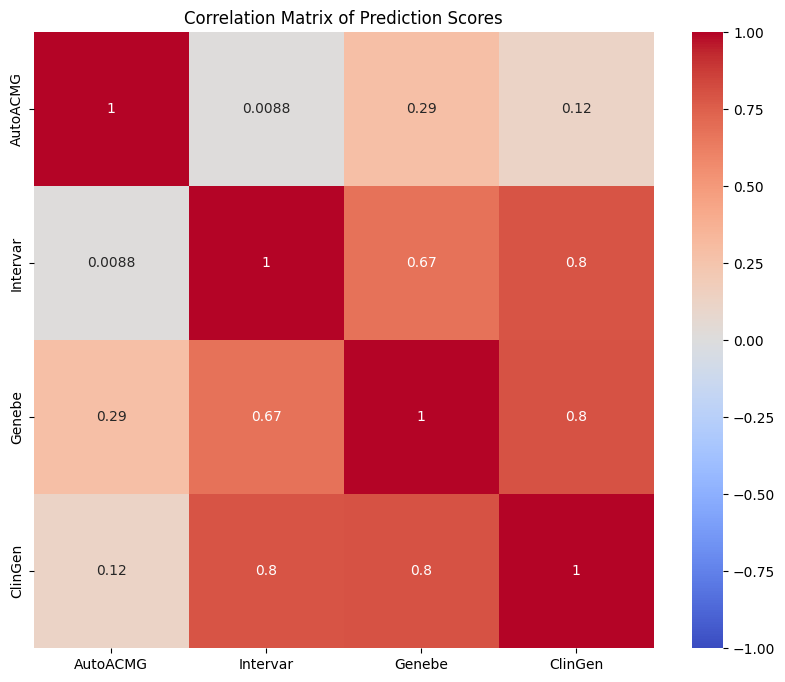

In [26]:
# Ensure that the columns for predictions and the evaluations by ClinGen are properly named
# and contain numerical values
# Example columns: 'AutoACMG_Score', 'Intervar_Score', 'Genebe_Score', 'ClinGen_Score'

# Calculate correlation matrix
tools = ["AutoACMG", "Intervar", "Genebe"]
all_tools = tools + ["ClinGen"]

correlation_matrix = pd.DataFrame(index=all_tools, columns=all_tools)

for tool1 in all_tools:
    for tool2 in all_tools:
        if tool1 == tool2:
            correlation_matrix.loc[tool1, tool2] = 1.0
        else:
            score1 = df[f"{tool1}_Score"].dropna()
            score2 = df[f"{tool2}_Score"].dropna()
            common_idx = score1.index.intersection(score2.index)
            correlation, _ = pearsonr(score1[common_idx], score2[common_idx])
            correlation_matrix.loc[tool1, tool2] = correlation

# Convert the correlation matrix to float
correlation_matrix = correlation_matrix.astype(float)

# Display correlation matrix
print(correlation_matrix)

# Save correlation matrix to CSV
correlation_matrix.to_csv("correlation_matrix.csv", index=True)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Prediction Scores")
plt.show()